In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras

C:\Users\1563a\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/PAMAP_features.csv")
#df = pd.read_csv("C:/ai/breast_cancer.csv", index_col=0)
df

,Unnamed: 0,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
0,3006,2,17,light,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
1,3497,2,4,moderate,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
2,14495,7,5,vigorous,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
3,13278,7,17,light,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
4,14969,8,3,light,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11768,10708,6,2,light,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
11769,4870,3,2,light,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11770,11822,6,4,moderate,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
11771,3866,2,7,moderate,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [17]:
# 데이터 분류

X=df.drop('act_level',axis=1)
y=df['act_level']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X.head())
print(y.value_counts())

   Unnamed: 0  sub_id  activity_id     hr_mean  hr_mean_normal    hr_std  \
0        3006       2           17   87.000000        1.175676  0.000000   
1        3497       2            4  124.605469        1.683858  0.927920   
2       14495       7            5  113.493430        1.891557  2.315888   
3       13278       7           17   82.513672        1.375228  0.492657   
4       14969       8            3   73.000000        1.106061  0.000000   

   hr_std_normal  hand_tmp_mean  hand_tmp_std  hand_acc_x_mean  ...  \
0   7.105427e-15        34.3750           0.0        -1.165524  ...   
1   1.253946e-02        31.8750           0.0       -12.040995  ...   
2   3.859813e-02        32.5000           0.0        -3.723040  ...   
3   8.210948e-03        33.8125           0.0        -3.618932  ...   
4   7.327472e-15        34.4375           0.0        -9.275877  ...   

   ankle_acc_xz_cor  hand_gyr_xy_cor  hand_gyr_yz_cor  hand_gyr_xz_cor  \
0          0.233251        -0.472662      

In [18]:
# classification 4종 import

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [19]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

print ("\n--- Radom Forest ---")
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9993206521739131
[[1250    0    0]
 [   0 1342    0]
 [   0    2  350]]


In [20]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9932065217391305
[[1247    3    0]
 [   2 1333    7]
 [   0    8  344]]


In [21]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.920516304347826
[[1219   31    0]
 [  43 1261   38]
 [   0  122  230]]


C:\Users\1563a\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
df.drop('sub_id',axis=1,inplace=True)
df.drop('activity_id',axis=1,inplace=True)
df["act_level"]=LabelEncoder().fit_transform(df["act_level"])
df

,Unnamed: 0,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
0,3006,0,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,2.383779,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
1,3497,1,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,3.734766,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
2,14495,2,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,10.188184,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
3,13278,0,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,1.935690,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
4,14969,0,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,0.082824,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11768,10708,0,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,0.087374,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
11769,4870,0,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,0.086820,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11770,11822,1,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,1.780491,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
11771,3866,1,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,3.245008,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [23]:
X=df.drop('act_level',axis=1).values
y = pd.get_dummies(df['act_level']).values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=12)

print(y.shape)

(11773, 3)


In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(X_train.shape[1],),activation='sigmoid'))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(6,activation='sigmoid'))
model.add(Dense(y_train.shape[1],activation='softmax'))

#model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])
model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\1563a\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823 (3.21 KB)

 Trainable params: 823 (3.21 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.4325 - loss: 0.9959 - val_accuracy: 0.4575 - val_loss: 0.9673
Epoch 2/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.4727 - loss: 0.9775 - val_accuracy: 0.4575 - val_loss: 0.9746
Epoch 3/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.4436 - loss: 0.9786 - val_accuracy: 0.4575 - val_loss: 0.9734
Epoch 4/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.4477 - loss: 0.9746 - val_accuracy: 0.4268 - val_loss: 0.9817
Epoch 5/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.4368 - loss: 0.9762 - val_accuracy: 0.4268 - val_loss: 0.9800
Epoch 6/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.4422 - loss: 0.9767 - val_accuracy: 0.4268 - val_loss: 0.9751
Epoch 7/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.4569 - loss: 0.9687 - val_accuracy: 0.4268 - val_loss: 0.9760
Epoch 8/30
265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.4424 - loss: 0.9782 - 

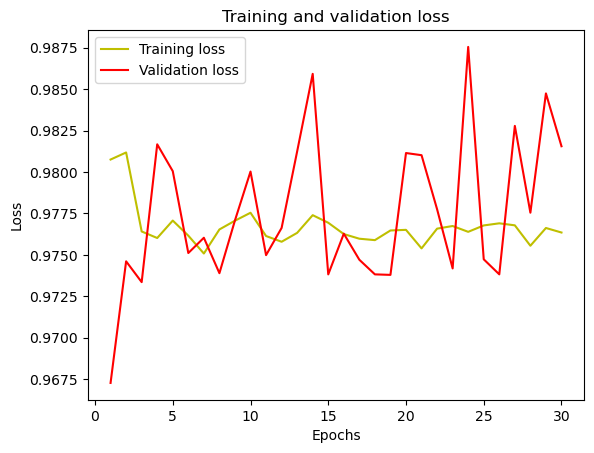

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1068
           1       0.44      1.00      0.61      1031
           2       0.00      0.00      0.00       256

    accuracy                           0.44      2355
   macro avg       0.15      0.33      0.20      2355
weighted avg       0.19      0.44      0.27      2355

[[   0 1068    0]
 [   0 1031    0]
 [   0  256    0]]


C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
